# Introduction to `gpvolve`

#### 1. Build a Markov model from a genotype-phenotype map.

In [1]:
# Import base class, Transition Path Theory class and functions for building Markov Model.
from gpvolve import GenotypePhenotypeMSM, TransitionPathTheory, linear_skew, mccandlish, find_max

# Import visualization tool.
from gpvolve.visualization import plot_network

# Import GenotypePhenotypeMap class for handling genotype-phenotype data.
from gpmap import GenotypePhenotypeMap

# Helper functions.
from scipy.sparse import dok_matrix

# Genotype-phenotype map data.
wildtype = "AAA"
genotypes = ["AAA", "AAT", "ATA", "TAA", "ATT", "TAT", "TTA", "TTT"]
phenotypes = [0.8, 0.81, 0.88, 0.89, 0.82, 0.82, 0.95, 1.0]

# Instantiate Markov model class.
gpm = GenotypePhenotypeMap(wildtype=wildtype,
                            genotypes=genotypes,
                            phenotypes=phenotypes)

In [2]:
# Instantiate a evolutionary Markov State Model from the genotype-phenotype map.
gpmsm = GenotypePhenotypeMSM(gpm)

#### 2. Apply an evolutionary model to describe transitions between genotypes.

In [3]:
# Map fitnesses to phenotypes.
gpmsm.apply_selection(fitness_function=linear_skew, selection_gradient=1)

# Build Markov State Model based on 'mccandlish' fixation probability function.
gpmsm.build_transition_matrix(fixation_model=mccandlish, population_size=100)

# Find global fitness peak.
fitness_peak = find_max(gpmsm=gpmsm, attribute='fitness')

#### 3. Calculate and plot the trajectory flux between the wildtype and triple mutant.

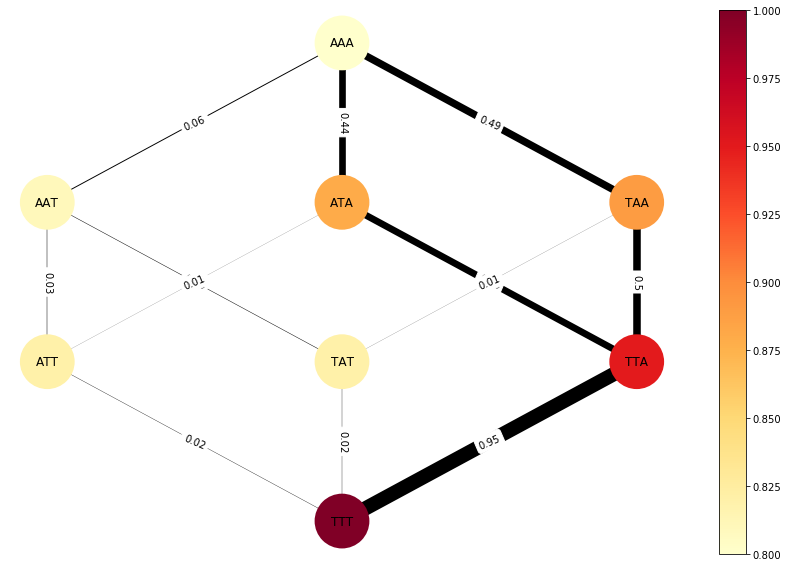

In [4]:
# Compute fluxes from wildtype to fitness peak.
fluxes = TransitionPathTheory(gpmsm, source=[0], target=[fitness_peak])

# Normalize flux.
norm_fluxes = fluxes.net_flux/fluxes.total_flux

# Plot the network and the fluxes
fig, ax = plot_network(gpmsm,
                       flux=dok_matrix(norm_fluxes),
                       edge_labels=True,
                       colorbar=True)